# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read the file

In [2]:
df = pd.read_csv("CAR DETAILS.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


# ML modeling
<pre>
1) Data Preprocessing
a) Handle Null Values
b) Handle Duplicates
c) Handle Inconsistent data
d) Change data types
e) Handling Outliers

2) Data Transformation
a) Scaling
b) Encoding

3) Model Building
a) Select x and y
b) Split data into train and test
c) Execute different ML models.
d) Evalute the perfoemance of the model
e) Identify the best model
f) Save the model
</pre>

# Data Preporcessing

In [3]:
df.shape 

(4340, 8)

In [4]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

#### Check Nulll Values

In [5]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

#### Check Duplicates

In [6]:
df.duplicated().sum()

763

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

#### Check data types

In [9]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

#### Check Inconsistent data

In [10]:
df.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


#### EDA

In [11]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')
Index(['year', 'selling_price', 'km_driven'], dtype='object')


In [12]:
cat_cols = cat_cols[1:]

#### Catgeorical Data

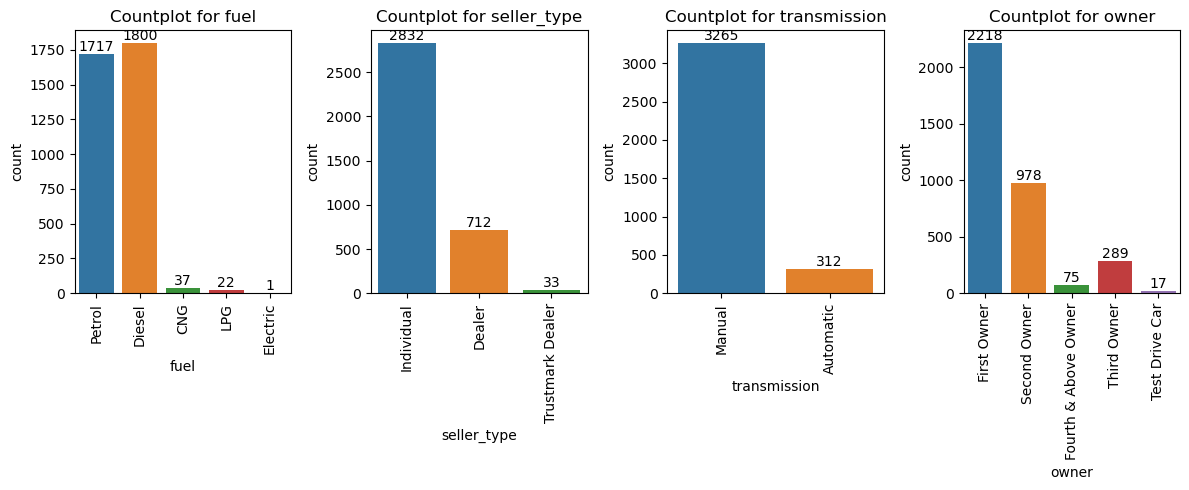

In [13]:
plt.figure(figsize=(12,5))
for i in range(len(cat_cols)):
    plt.subplot(1,len(cat_cols),i+1)
    ax = sns.countplot(x = df[cat_cols[i]])
    ax.bar_label(ax.containers[0])
    plt.title(f'Countplot for {cat_cols[i]}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
    
plt.show()

#### Numerical Data

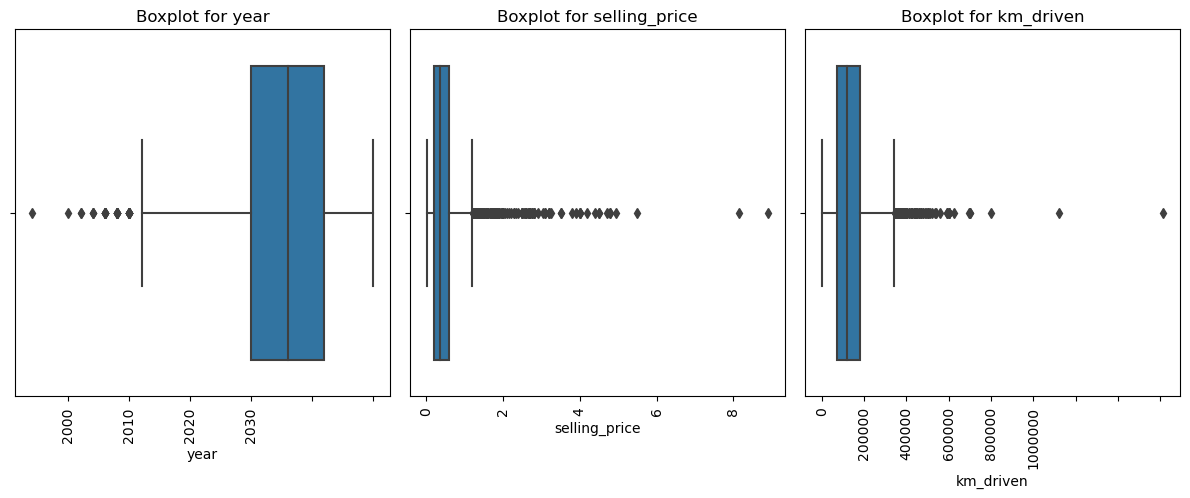

In [14]:
plt.figure(figsize=(12, 5))

for i in range(len(num_cols)):
    plt.subplot(1, len(num_cols), i+1)  # Dynamically set the number of columns
    ax = sns.boxplot(x=df[num_cols[i]])
    plt.title(f'Boxplot for {num_cols[i]}')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)  # Rotate x-axis labels by 90 degrees

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

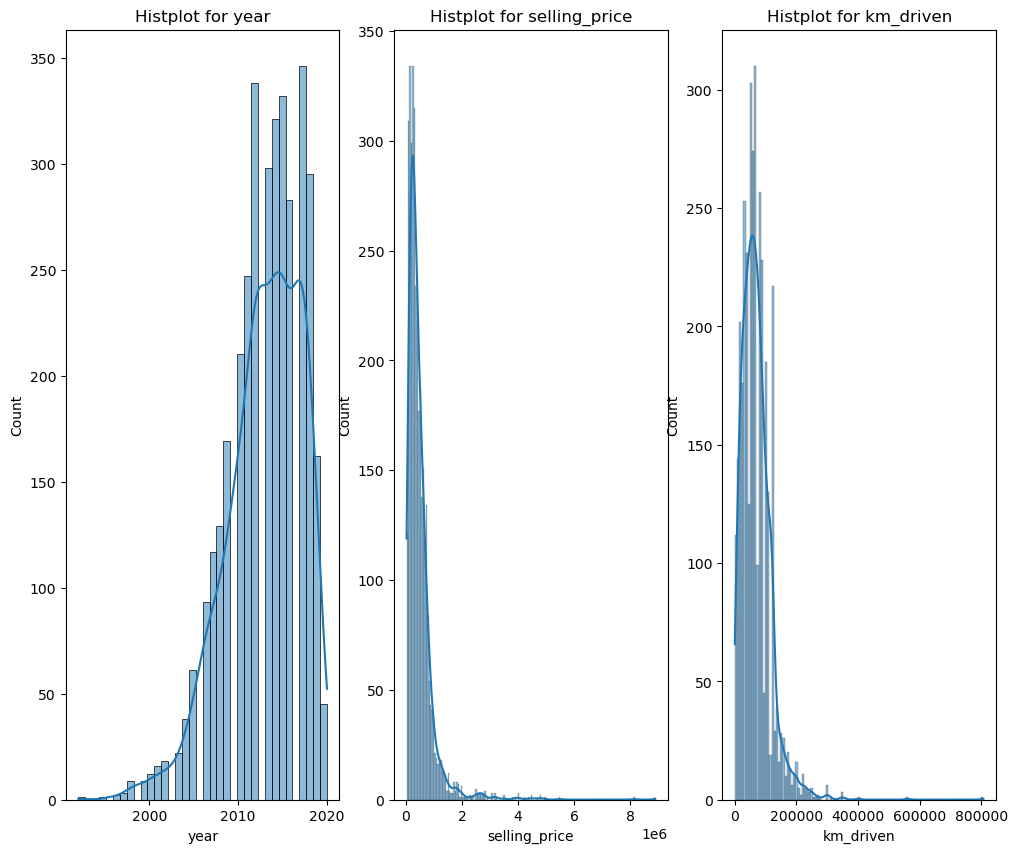

In [15]:
plt.figure(figsize=(12,10))
for i in range(len(num_cols)):
    plt.subplot(1,len(num_cols),i+1)
    sns.histplot(x = df[num_cols[i]],kde=True)
    plt.title(f'Histplot for {num_cols[i]}')

plt.show()

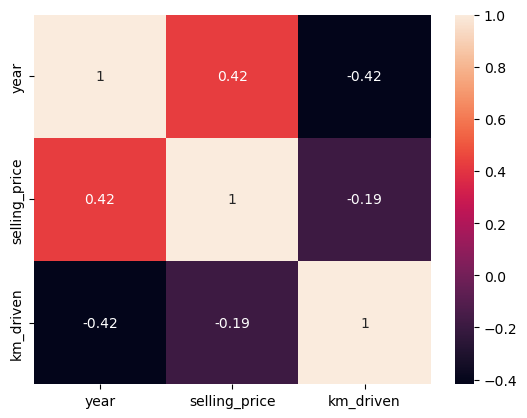

In [16]:
corr = df[num_cols].corr()

sns.heatmap(corr,annot=True)
plt.show()

#### Outlier Treatment - Cap

In [17]:
df.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


#### Outlier Treatment - Cap

In [18]:
a = df[num_cols].describe(percentiles=[0.01,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,50%,95%,97%,98%,99%,max
year,1992.0,2000.00,2013.0,2019.0,2019.0,2019.0,2020.0,2020.0
selling_price,20000.0,51786.64,350000.0,1200000.0,1497200.0,1800000.0,2675000.0,8900000.0
km_driven,1.0,1744.08,60000.0,149534.8,170000.0,193440.0,223158.4,806599.0


#### Outliers Detection

In [19]:
print(df[df['km_driven']>200000].shape)
print(df[df['selling_price']>2000000].shape)

(53, 8)
(56, 8)


#### Handle the Outliers

In [20]:
df1 = df.copy()

In [21]:
df['km_driven'] = np.where(df['km_driven']>200000 , 200000,df['km_driven'])
df['selling_price'] = np.where(df['selling_price']>2000000 , 2000000,df['selling_price'])

#### Encode the Catgeorical Features

In [22]:
print(cat_cols)

Index(['fuel', 'seller_type', 'transmission', 'owner'], dtype='object')


In [23]:
for i in cat_cols:
    print(i,df[i].unique(),df[i].nunique())

fuel ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric'] 5
seller_type ['Individual' 'Dealer' 'Trustmark Dealer'] 3
transmission ['Manual' 'Automatic'] 2
owner ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car'] 5


In [24]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission     object
owner            object
dtype: object

In [25]:
df['transmission'] = df['transmission'].replace({'Manual':1,'Automatic':0})

In [26]:
for i in cat_cols:
    print(i,df[i].unique(),df[i].nunique())

fuel ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric'] 5
seller_type ['Individual' 'Dealer' 'Trustmark Dealer'] 3
transmission [1 0] 2
owner ['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car'] 5


In [27]:
df.dtypes

name             object
year              int64
selling_price     int64
km_driven         int64
fuel             object
seller_type      object
transmission      int64
owner            object
dtype: object

In [28]:
df_dummies = pd.get_dummies(data=df,columns=['fuel','seller_type','owner'],drop_first=True,
                           dtype=int)
print(df_dummies.shape)
print(df_dummies.columns)

(3577, 15)
Index(['name', 'year', 'selling_price', 'km_driven', 'transmission',
       'fuel_Diesel', 'fuel_Electric', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')


In [29]:
df_dummies.head()

,name,year,selling_price,km_driven,transmission,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0,1,1,0,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0,1,1,0,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,0,0,0,1,0,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0,1,1,0,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,0,0,0,1,0,0,1,0,0


#### Feature Engineering

In [30]:
from sklearn.preprocessing import StandardScaler
cols_to_scale = ['selling_price', 'km_driven']
scaler = StandardScaler()
# Fit and transform the selected columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Display the scaled DataFrame
print(df)


                                     name  year  selling_price  km_driven  \
0                           Maruti 800 AC  2007      -1.050282   0.041521   
1                Maruti Wagon R LXI Minor  2007      -0.849795  -0.430663   
2                    Hyundai Verna 1.6 SX  2012       0.393223   0.749796   
3                  Datsun RediGO T Option  2017      -0.542382  -0.525100   
4                   Honda Amaze VX i-DTEC  2014      -0.007751   1.717773   
...                                   ...   ...            ...        ...   
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014      -0.114680   0.277613   
4336           Hyundai i20 Magna 1.4 CRDi  2014      -0.114680   0.277613   
4337                  Maruti 800 AC BSIII  2009      -0.916624   0.348440   
4338     Hyundai Creta 1.6 CRDi SX Option  2016       1.101610   0.513704   
4339                     Renault KWID RXT  2016      -0.609211  -0.666755   

        fuel seller_type  transmission         owner  
0     Petrol  Indivi

#### Select x and y

In [31]:
x = df_dummies.drop(['selling_price', 'name'], axis=1)
y = df_dummies['selling_price']
print(x.shape)
print(y.shape)

(3577, 13)
(3577,)


#### Split the data into train and test

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,
                                                random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2503, 13)
(1074, 13)
(2503,)
(1074,)


#### Create Function to Evaluate the Model

In [34]:
from sklearn.metrics import *

In [35]:
# R2_Score = 1 - sse/sst

In [36]:
def eval_model(model,mname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 =  model.score(x_train,y_train)
    test_r2 = model.score(x_test,y_test)
    test_mae = mean_absolute_error(y_test,ypred)
    test_mse = mean_squared_error(y_test,ypred)
    test_rmse = np.sqrt(test_mse)
    res_df = pd.DataFrame({'Train_R2':train_r2,'Test_R2':test_r2,
                          'Test_MAE':test_mae,'Test_MSE':test_mse,
                          'Test_RMSE':test_rmse},index=[mname])
    return res_df

#### Import ML models

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso



#### 1) Linear Regression

In [38]:
lr1 = LinearRegression()

lr1_res = eval_model(lr1,'Linear_Reg')
lr1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Linear_Reg,0.537042,0.57761,175149.748475,6.092590e+10,246831.719784


#### 2) Decision Tree Reg

In [39]:
dt1 = DecisionTreeRegressor(max_depth=80,min_samples_split=20)

dt1_res = eval_model(dt1,'DTree_Reg')
dt1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
DTree_Reg,0.742518,0.548697,165817.882121,6.509633e+10,255139.832295


#### 3) Random Forest Regression

In [40]:
rf1 = RandomForestRegressor(n_estimators=18,max_depth=5,
                            min_samples_split=5)

rf1_res = eval_model(rf1,'RandomForest_Reg')
rf1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
RandomForest_Reg,0.670295,0.648268,151024.38753,5.073415e+10,225242.42651


#### 4) Gradient Boost Regression

In [41]:
gb1 = GradientBoostingRegressor(random_state=42)



gb1_res = eval_model(gb1,'Gradient_boost')
gb1_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Gradient_boost,0.685097,0.652104,149497.748143,5.018086e+10,224010.83861


In [42]:
all_res = pd.concat([lr1_res,dt1_res,rf1_res,gb1_res])
all_res

,Train_R2,Test_R2,Test_MAE,Test_MSE,Test_RMSE
Linear_Reg,0.537042,0.577610,175149.748475,6.092590e+10,246831.719784
DTree_Reg,0.742518,0.548697,165817.882121,6.509633e+10,255139.832295
RandomForest_Reg,0.670295,0.648268,151024.387530,5.073415e+10,225242.426510
Gradient_boost,0.685097,0.652104,149497.748143,5.018086e+10,224010.838610


#### Save the Model

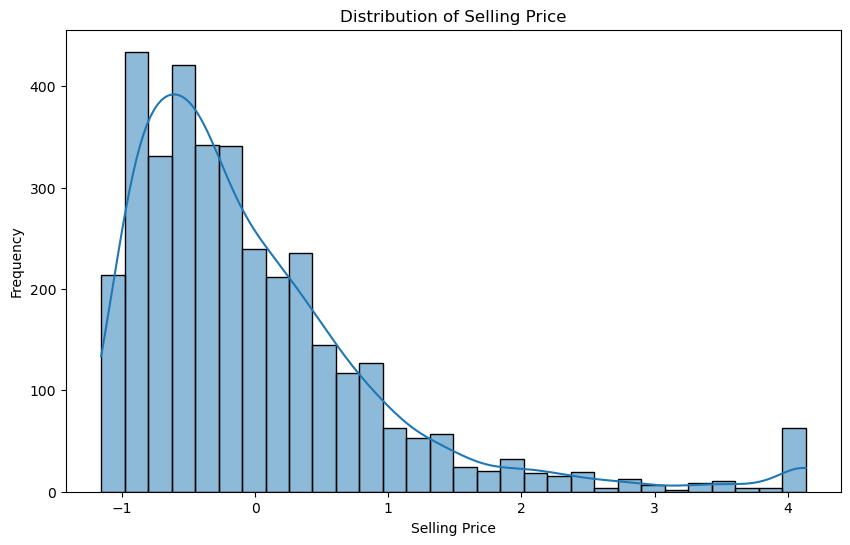

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of selling price
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=30, kde=True)
plt.title('Distribution of Selling Price')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()



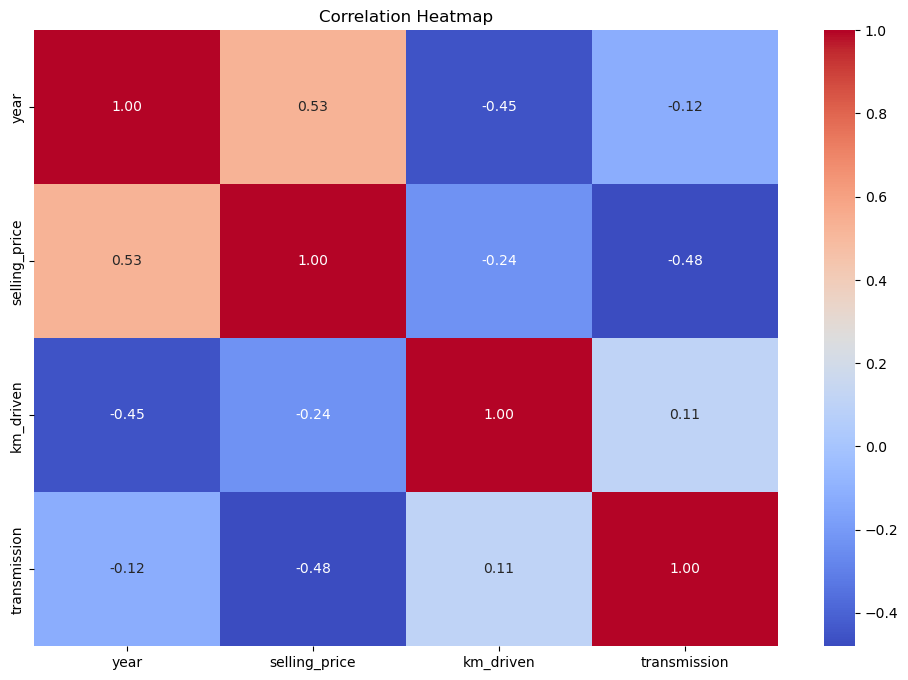

In [47]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


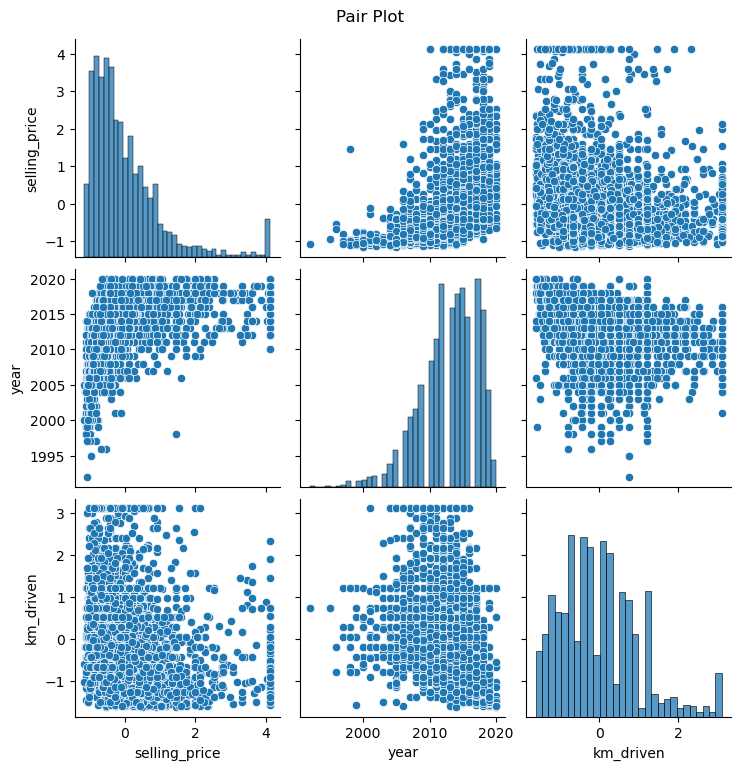

In [48]:

# Pair plot
sns.pairplot(df[['selling_price', 'year', 'km_driven']])
plt.suptitle('Pair Plot', y=1.02)
plt.show()



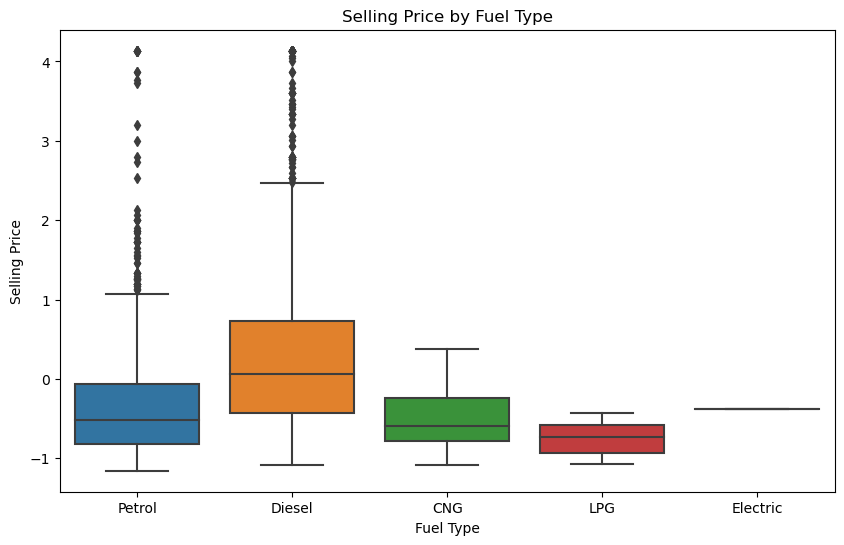

In [49]:
# Box plot of selling price by fuel type
plt.figure(figsize=(10, 6))
sns.boxplot(x='fuel', y='selling_price', data=df)
plt.title('Selling Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()



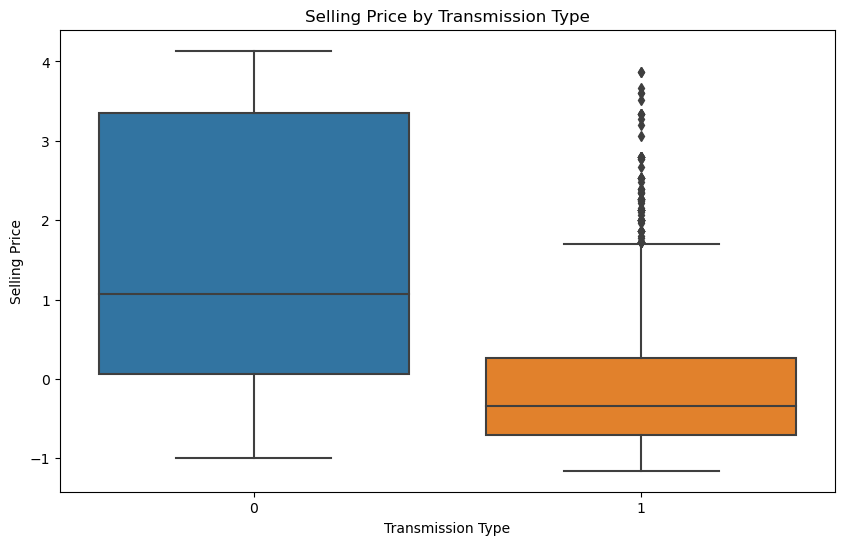

In [51]:

# Box plot of selling price by transmission type
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='selling_price', data=df)
plt.title('Selling Price by Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.show()


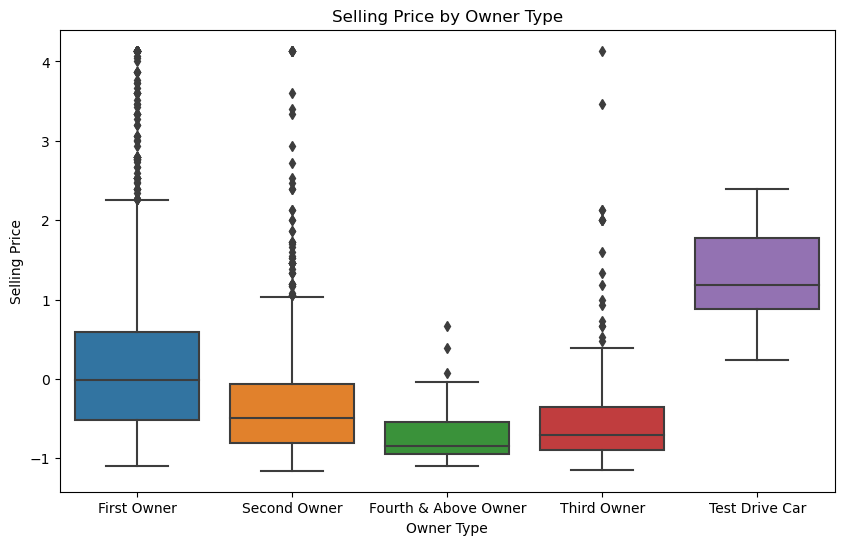

In [52]:

# Box plot of selling price by owner type
plt.figure(figsize=(10, 6))
sns.boxplot(x='owner', y='selling_price', data=df)
plt.title('Selling Price by Owner Type')
plt.xlabel('Owner Type')
plt.ylabel('Selling Price')
plt.show()



In [53]:
import pickle

In [54]:
pickle.dump(lr1,open('C:\\Users\\priya\\Desktop\\ML-Projects\\Car Details\\lr1.pkl','wb'))
pickle.dump(dt1,open('C:\\Users\\priya\\Desktop\\ML-Projects\\Car Details\\dt1.pkl','wb'))
pickle.dump(rf1,open('C:\\Users\\priya\\Desktop\\ML-Projects\\Car Details\\rf1.pkl','wb'))
pickle.dump(gb1,open('C:\\Users\\priya\\Desktop\\ML-Projects\\Car Details\\gb1.pkl','wb'))

In [56]:
rf_model= pickle.load(open('C:\\Users\\priya\\Desktop\\ML-Projects\\Car Details\\rf1.pkl','rb'))
dt_model= pickle.load(open('C:\\Users\\priya\\Desktop\\ML-Projects\\Car Details\\dt1.pkl','rb'))
gb_model= pickle.load(open('C:\\Users\\priya\\Desktop\\ML-Projects\\Car Details\\gb1.pkl','rb'))
